In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,classification_report,confusion_matrix,accuracy_score

In [5]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [6]:
data = pd.read_csv(r"C:\Users\Vinod\OneDrive\Desktop\Chetana\Weather Data.csv")  
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [7]:
Head=data.head()
print(Head)

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [8]:
print(data.tail())

             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa Weather  
8779            9.7     100.13    Snow  
8780            9.7     100.03    Snow  
8781            4.8      99.95    Snow  
8782            9.7      99.91    Snow  
8783           11.3      99.89    Snow  


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
Sample=data.sample(20)
print(Sample)

             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
7787  11/20/2012 11:00     3.0              -2.2         69                6   
5678   8/24/2012 14:00    27.7              13.5         42               11   
1303    2/24/2012 7:00    -1.3              -3.8         83               11   
6912   10/15/2012 0:00     8.8               8.4         97               13   
4917   7/23/2012 21:00    18.1              17.7         98               11   
6746    10/8/2012 2:00     5.4               3.0         84                6   
5458   8/15/2012 10:00    21.5              18.3         82               13   
7640   11/14/2012 8:00    -3.0              -4.9         87                4   
7849   11/23/2012 1:00     2.7              -1.0         77               17   
8158   12/5/2012 22:00    -1.6              -9.5         55               26   
2617    4/19/2012 1:00     5.5              -2.7         55                6   
7319  10/31/2012 23:00     8.1          

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


In [12]:
print(data.describe(include='all'))

               Date/Time       Temp_C  Dew Point Temp_C    Rel Hum_%  \
count               8784  8784.000000       8784.000000  8784.000000   
unique              8784          NaN               NaN          NaN   
top     12/31/2012 23:00          NaN               NaN          NaN   
freq                   1          NaN               NaN          NaN   
mean                 NaN     8.798144          2.555294    67.431694   
std                  NaN    11.687883         10.883072    16.918881   
min                  NaN   -23.300000        -28.500000    18.000000   
25%                  NaN     0.100000         -5.900000    56.000000   
50%                  NaN     9.300000          3.300000    68.000000   
75%                  NaN    18.800000         11.800000    81.000000   
max                  NaN    33.000000         24.400000   100.000000   

        Wind Speed_km/h  Visibility_km    Press_kPa       Weather  
count       8784.000000    8784.000000  8784.000000          8784  

In [13]:
print(data.describe(include='object'))

               Date/Time       Weather
count               8784          8784
unique              8784            50
top     12/31/2012 23:00  Mainly Clear
freq                   1          2106


In [14]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [15]:
data['Rel Hum_%'].unique()

array([ 86,  87,  89,  88,  85,  91,  82,  81,  84,  79,  77,  72,  71,
        69,  70,  68,  67,  66,  56,  57,  59,  55,  54,  58,  65,  53,
        60,  61,  63,  52,  50,  49,  62,  51,  75,  73,  80,  83,  76,
        64,  74,  78,  47,  90,  48,  45,  46,  92,  93,  42,  43,  40,
        39,  44,  94,  37,  41,  38,  96,  98,  99,  97,  95, 100,  29,
        28,  27,  19,  20,  18,  25,  26,  30,  24,  34,  33,  31,  32,
        35,  36,  21,  22,  23])

In [16]:
data['Rel Hum_%'].nunique()

83

In [17]:
data.loc[3]

Date/Time                  1/1/2012 3:00
Temp_C                              -1.5
Dew Point Temp_C                    -3.2
Rel Hum_%                             88
Wind Speed_km/h                        6
Visibility_km                        4.0
Press_kPa                         101.27
Weather             Freezing Drizzle,Fog
Name: 3, dtype: object

In [18]:
data.iloc[0:3]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [19]:
data['Rel Hum_%'].max()

np.int64(100)

In [20]:
data['Rel Hum_%'].min()

np.int64(18)

In [21]:
data["Rel Hum_%"] = pd.to_numeric(data["Rel Hum_%"], errors='coerce')
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [22]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [23]:
print(data.shape)
print(f"number of record present in given dataset is:{data.shape[0]}")
print(f"number of attributes present in given dataset is:{data.shape[1]}")

(8784, 8)
number of record present in given dataset is:8784
number of attributes present in given dataset is:8


In [24]:
data.rename(columns={'Date/Time':'DateandTime'},inplace=True)
data

,DateandTime,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [25]:
data[['Date','Time']] = data.DateandTime.str.split(" ", expand = True)
data

,DateandTime,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1/1/2012,0:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1/1/2012,1:00
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1/1/2012,2:00
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1/1/2012,3:00
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1/1/2012,4:00
...,...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow,12/31/2012,19:00
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow,12/31/2012,20:00
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,12/31/2012,21:00
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,12/31/2012,22:00


In [26]:
data.drop('DateandTime',axis=1)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,-1.8,-3.9,86,4,8.0,101.24,Fog,1/1/2012,0:00
1,-1.8,-3.7,87,4,8.0,101.24,Fog,1/1/2012,1:00
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1/1/2012,2:00
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1/1/2012,3:00
4,-1.5,-3.3,88,7,4.8,101.23,Fog,1/1/2012,4:00
...,...,...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,Snow,12/31/2012,19:00
8780,0.2,-2.4,83,24,9.7,100.03,Snow,12/31/2012,20:00
8781,-0.5,-1.5,93,28,4.8,99.95,Snow,12/31/2012,21:00
8782,-0.2,-1.8,89,28,9.7,99.91,Snow,12/31/2012,22:00


In [27]:
data=data[["Date","Time","Weather","Temp_C","Dew Point Temp_C","Rel Hum_%","Wind Speed_km/h","Visibility_km","Press_kPa"]]
data

,Date,Time,Weather,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,1/1/2012,0:00,Fog,-1.8,-3.9,86,4,8.0,101.24
1,1/1/2012,1:00,Fog,-1.8,-3.7,87,4,8.0,101.24
2,1/1/2012,2:00,"Freezing Drizzle,Fog",-1.8,-3.4,89,7,4.0,101.26
3,1/1/2012,3:00,"Freezing Drizzle,Fog",-1.5,-3.2,88,6,4.0,101.27
4,1/1/2012,4:00,Fog,-1.5,-3.3,88,7,4.8,101.23
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012,19:00,Snow,0.1,-2.7,81,30,9.7,100.13
8780,12/31/2012,20:00,Snow,0.2,-2.4,83,24,9.7,100.03
8781,12/31/2012,21:00,Snow,-0.5,-1.5,93,28,4.8,99.95
8782,12/31/2012,22:00,Snow,-0.2,-1.8,89,28,9.7,99.91


In [28]:
data.columns

Index(['Date', 'Time', 'Weather', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa'],
      dtype='object')

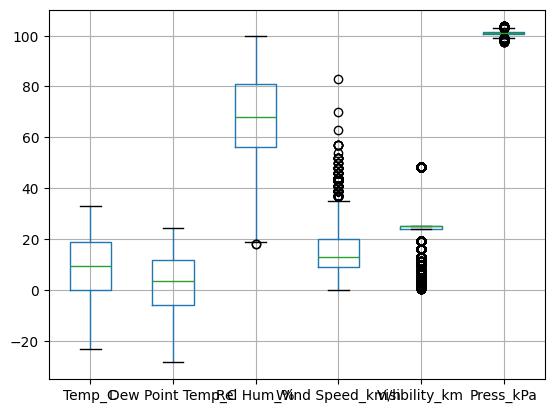

In [29]:
data.boxplot()
plt.show()

In [30]:
data.dtypes


Date                 object
Time                 object
Weather              object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
dtype: object

In [31]:
import pandas as pd

# Assuming 'data' is already provided as a dictionary or DataFrame
numerical = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
df = pd.DataFrame(data)

# Select only the numerical columns for IQR calculation
df_numerical = df[numerical]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where any column has values outside the IQR bounds
# Use broadcasting to compare each column of the DataFrame with the respective lower and upper bounds
mask = (df_numerical >= lower_bound) & (df_numerical <= upper_bound)

# Only keep rows where all values are within the bounds (no outliers in any column)
df_without_outliers = df[mask.all(axis=1)]

# Display the DataFrame without outliers
print(df_without_outliers)


            Date   Time        Weather  Temp_C  Dew Point Temp_C  Rel Hum_%  \
20      1/1/2012  20:00         Cloudy     3.2               1.3         87   
21      1/1/2012  21:00         Cloudy     4.0               1.7         85   
23      1/1/2012  23:00         Cloudy     5.3               2.0         79   
24      1/2/2012   0:00   Rain Showers     5.2               1.5         77   
26      1/2/2012   2:00  Mostly Cloudy     3.9              -0.9         71   
...          ...    ...            ...     ...               ...        ...   
8762  12/31/2012   2:00         Cloudy   -10.1             -13.4         77   
8763  12/31/2012   3:00  Mostly Cloudy   -11.8             -14.4         81   
8764  12/31/2012   4:00         Cloudy   -10.5             -12.8         83   
8765  12/31/2012   5:00         Cloudy   -10.2             -12.4         84   
8766  12/31/2012   6:00         Cloudy    -9.7             -11.7         85   

      Wind Speed_km/h  Visibility_km  Press_kPa  
2

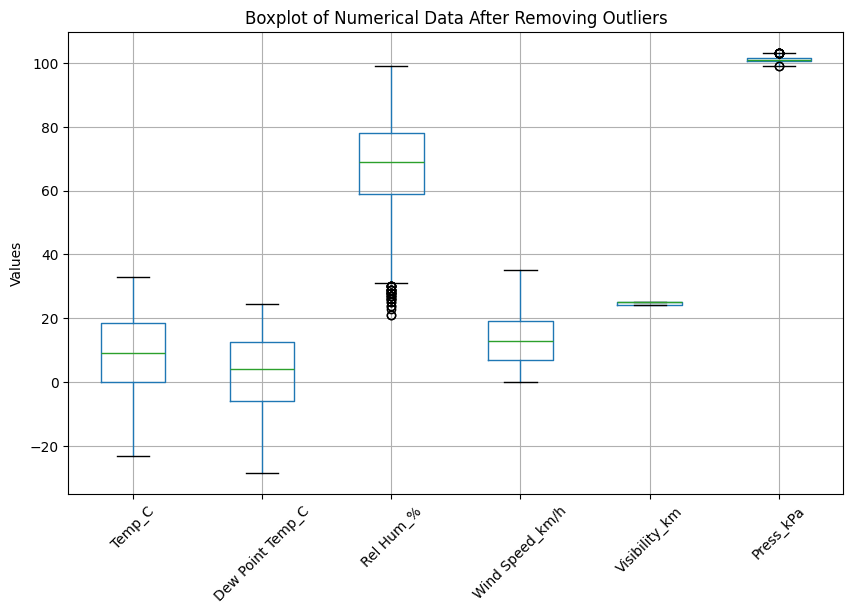

In [32]:
# Plotting the boxplot for the DataFrame without outliers
df_without_outliers[numerical].boxplot(figsize=(10, 6))
plt.title('Boxplot of Numerical Data After Removing Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

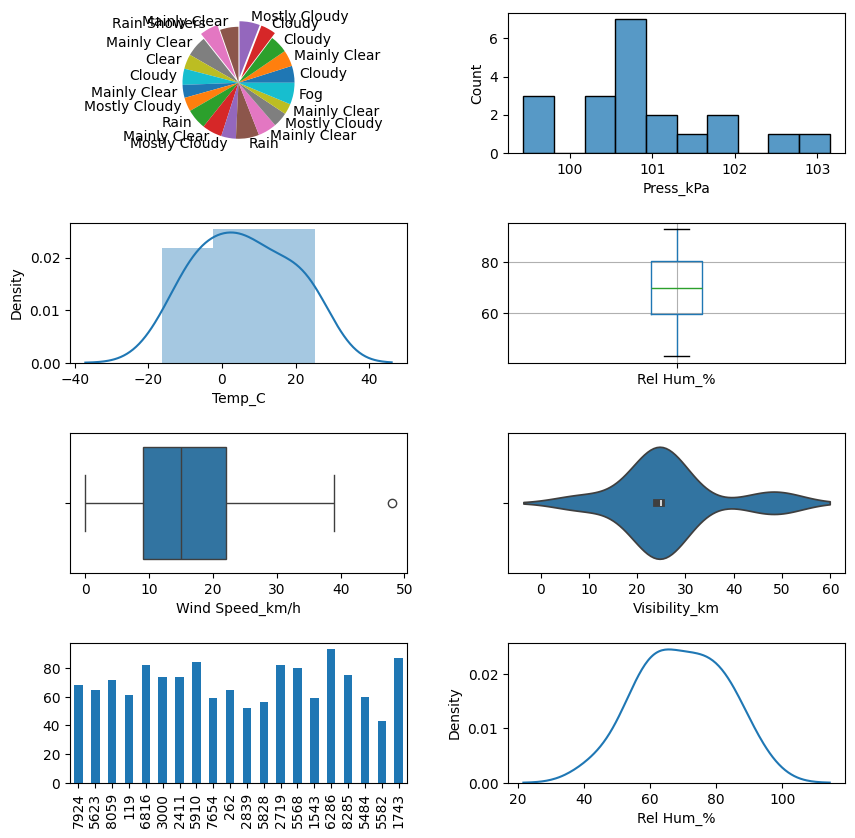

In [33]:
#univariate analysis
plt.figure(figsize=(10,10))
plt.subplot(4,2,4)
Sample.boxplot(column='Rel Hum_%')

plt.subplot(4,2,1)
explode = [0, 0, 0, 0.1,0.1,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(Sample['Rel Hum_%'], labels=Sample['Weather'],explode=explode)

plt.subplot(4,2,3)
sns.distplot(Sample['Temp_C'])

plt.subplot(4,2,2)
sns.histplot(Sample["Press_kPa"], bins=10)

plt.subplot(4,2,5)
sns.boxplot(x=Sample["Wind Speed_km/h"])

plt.subplot(4,2,6)
sns.violinplot(x=Sample["Visibility_km"])

plt.subplot(4,2,7)
Sample['Rel Hum_%'].plot(kind='bar',width=0.5)

plt.subplot(4,2,8)
sns.distplot(Sample['Rel Hum_%'], hist=False)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()



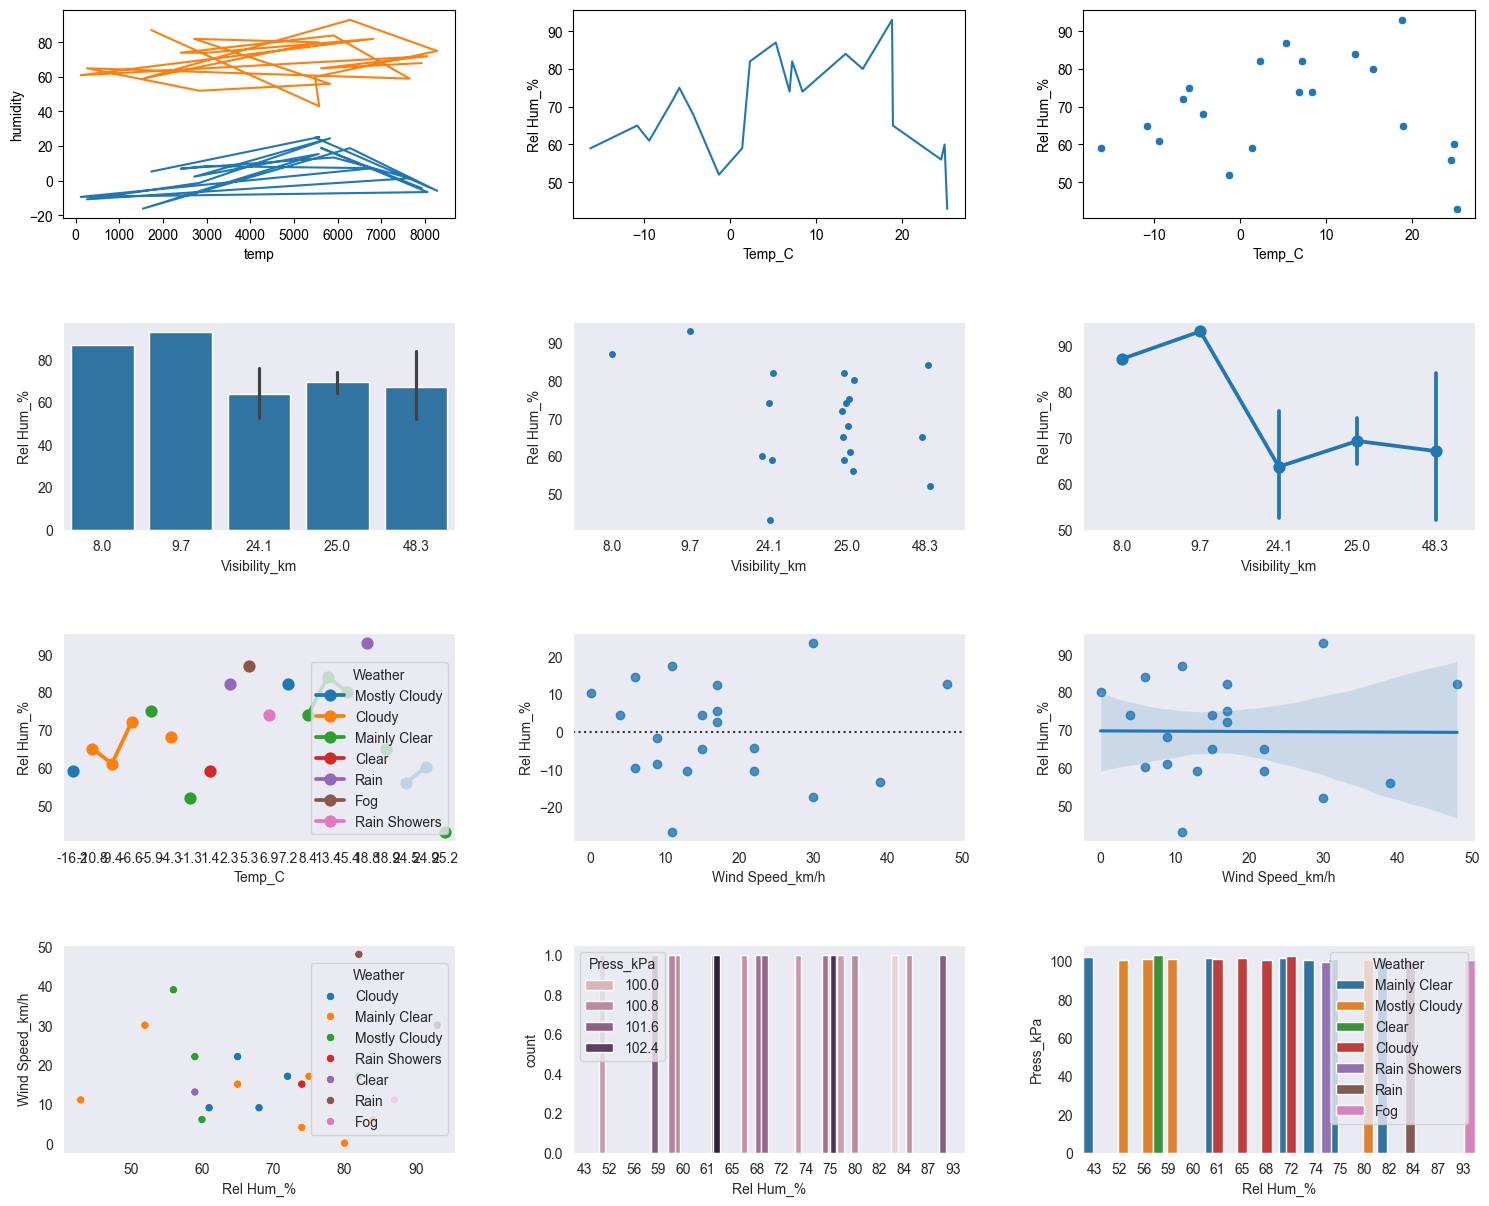

In [39]:
#bivariate analysis
plt.figure(figsize=(15,15))
plt.subplot(5,3,1)
plt.plot(Sample['Temp_C'])
plt.plot(Sample['Rel Hum_%'])
plt.ylabel('humidity')
plt.xlabel('temp')

plt.subplot(5,3,2)
sns.lineplot(x="Temp_C", y="Rel Hum_%", data=Sample)

plt.subplot(5,3,3)
sns.set_style("dark")
sns.scatterplot(x="Temp_C", y="Rel Hum_%", data=Sample)

plt.subplot(5,3,4)
sns.barplot(y="Rel Hum_%",x="Visibility_km",data=Sample)

plt.subplot(5,3,5)
sns.stripplot(x="Visibility_km", y="Rel Hum_%", data=Sample)

plt.subplot(5,3,6)
sns.pointplot(x="Visibility_km", y="Rel Hum_%", data=Sample)

plt.subplot(5,3,7)
sns.pointplot(x="Temp_C", y="Rel Hum_%", hue="Weather", data=Sample)

plt.subplot(5,3,8)
sns.residplot(x="Wind Speed_km/h", y="Rel Hum_%", data=Sample)

plt.subplot(5,3,9)
sns.regplot(x="Wind Speed_km/h", y="Rel Hum_%", data=Sample)

plt.subplot(5,3,10)
sns.scatterplot(x=Sample['Rel Hum_%'],y= Sample['Wind Speed_km/h'], hue=Sample['Weather'])

plt.subplot(5,3,11)
sns.countplot(x='Rel Hum_%', data=Sample, hue='Press_kPa',width=5)

plt.subplot(5,3,12)
sns.barplot(x=Sample['Rel Hum_%'],y=Sample['Press_kPa'],hue=Sample['Weather'],width=3)

plt.suptitle('Graphs showing relation between humidity and other independent data columns', fontsize=0.5)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

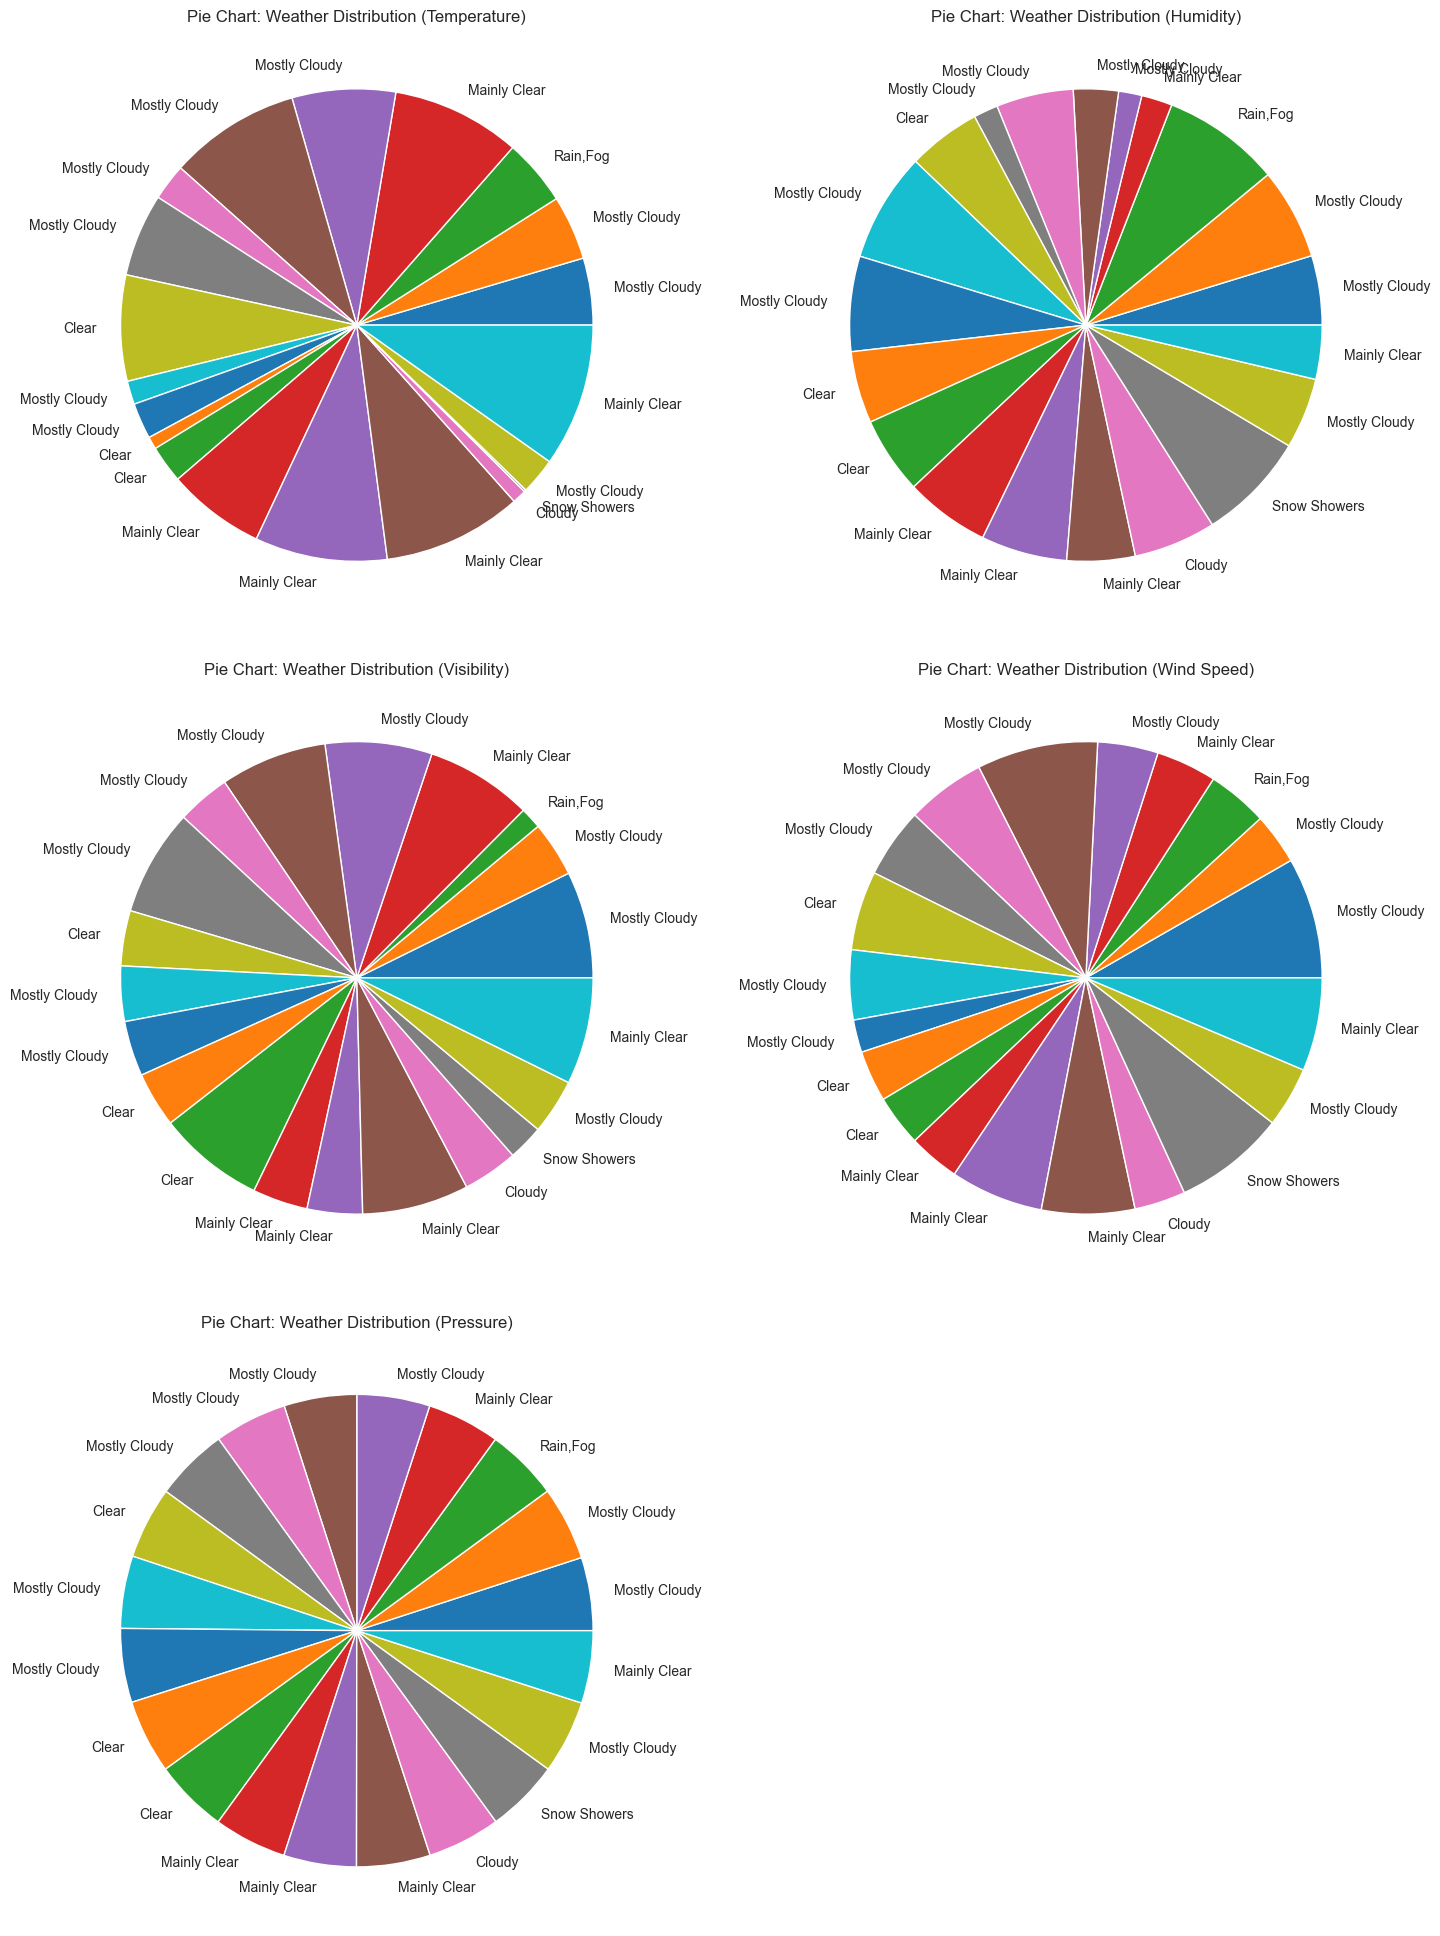

In [24]:
plt.figure(figsize=(15, 20))

# Create subplots
plt.subplot(3, 2, 1)
Sample['Temp_C'] = Sample['Temp_C'].abs()
plt.pie(Sample['Temp_C'], labels=Sample['Weather'])
plt.title('Pie Chart: Weather Distribution (Temperature)')

plt.subplot(3, 2, 2)
plt.pie(Sample['Rel Hum_%'], labels=Sample['Weather'])
plt.title('Pie Chart: Weather Distribution (Humidity)')

plt.subplot(3, 2, 3)
plt.pie(Sample['Visibility_km'], labels=Sample['Weather'])
plt.title('Pie Chart: Weather Distribution (Visibility)')

plt.subplot(3, 2, 4)
plt.pie(Sample['Wind Speed_km/h'], labels=Sample['Weather'])
plt.title('Pie Chart: Weather Distribution (Wind Speed)')

plt.subplot(3, 2, 5)
plt.pie(Sample['Press_kPa'], labels=Sample['Weather'])
plt.title('Pie Chart: Weather Distribution (Pressure)')

plt.tight_layout(pad=3.0)

plt.show()


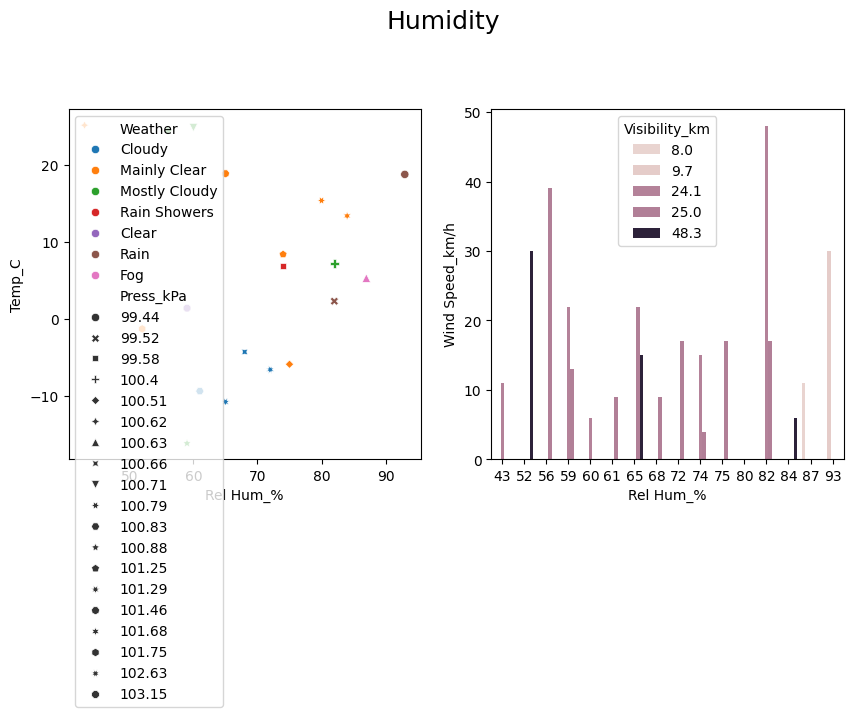

In [38]:
#multivariate analysis
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(x='Rel Hum_%',y='Temp_C', data=Sample, hue=Sample['Weather'],style=Sample['Press_kPa'])

plt.subplot(2,2,2)
sns.barplot(x =Sample['Rel Hum_%'],y = Sample['Wind Speed_km/h'],hue= Sample['Visibility_km'])
plt.suptitle('Humidity', fontsize=18)

plt.show()

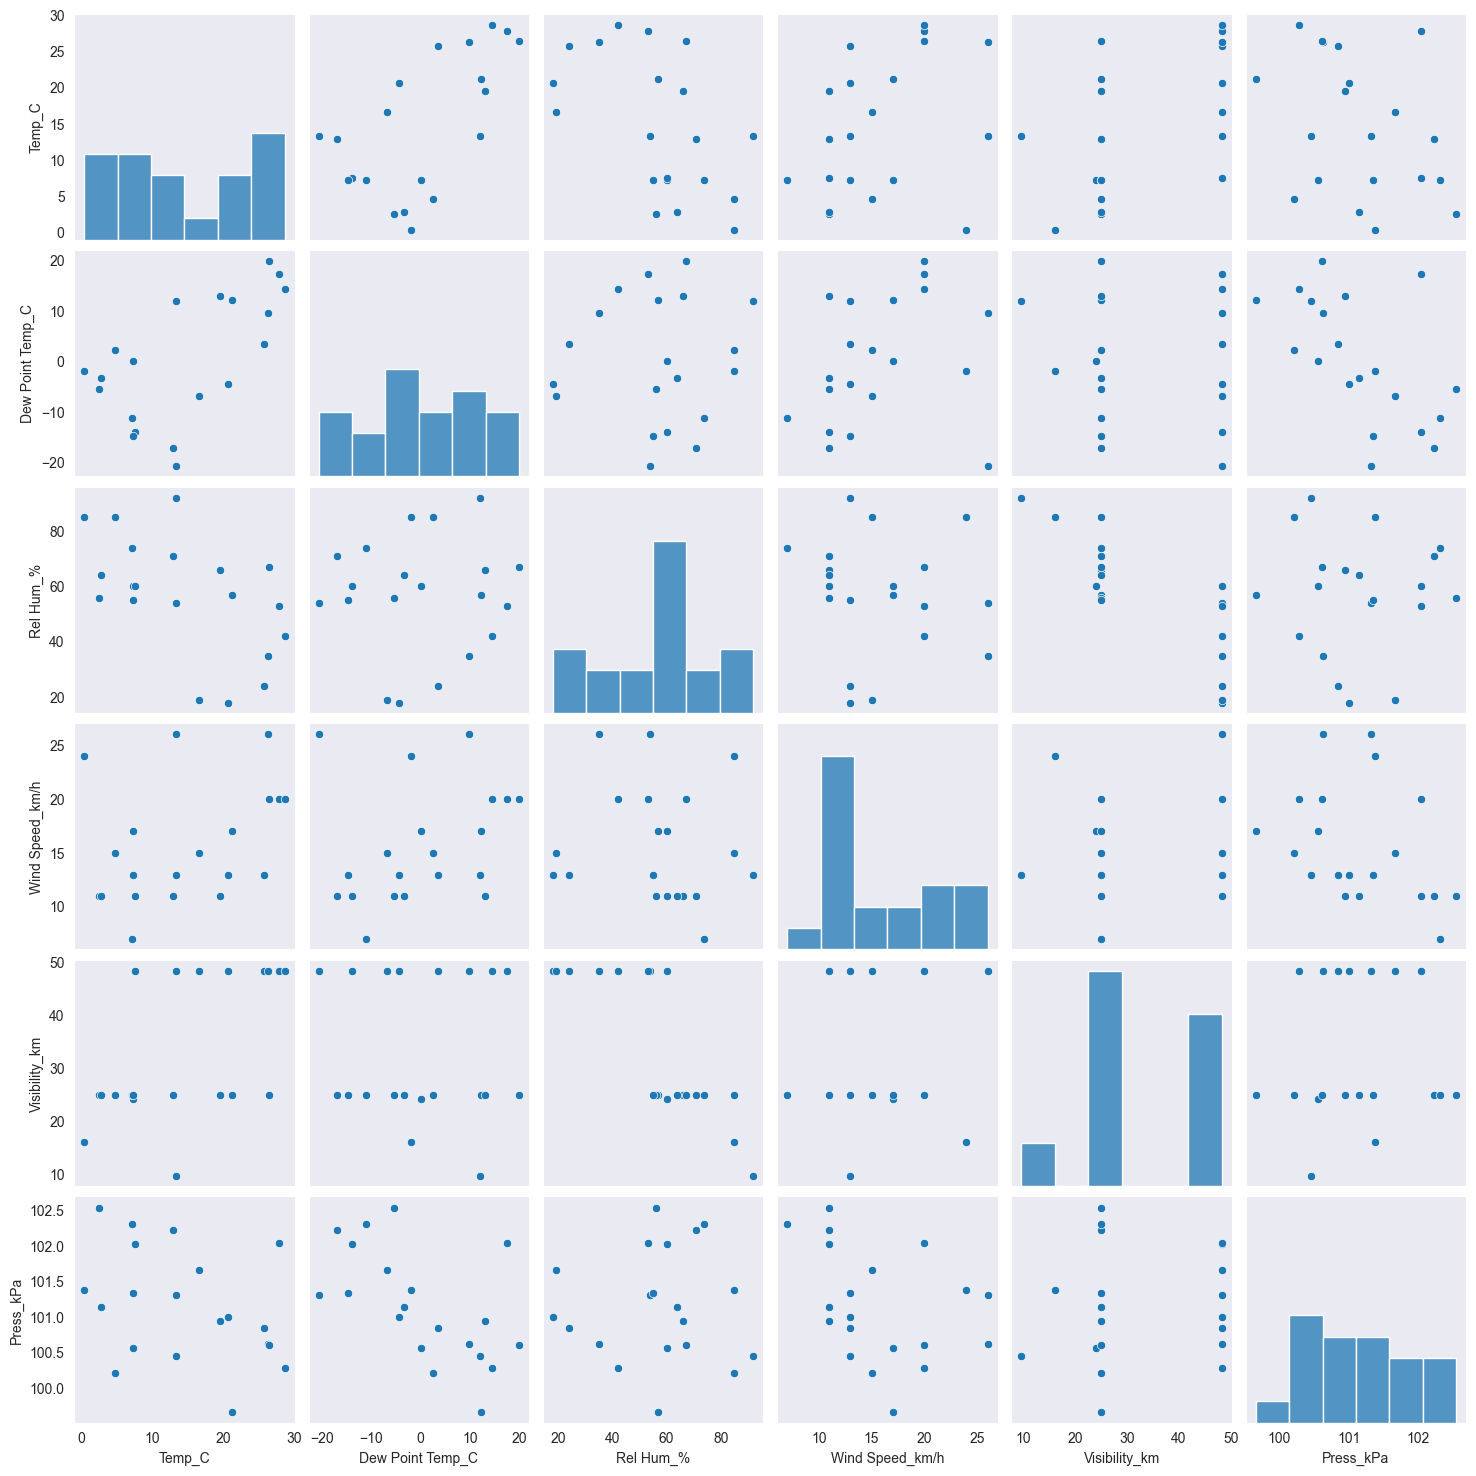

In [30]:
sns.pairplot(Sample)
plt.show()

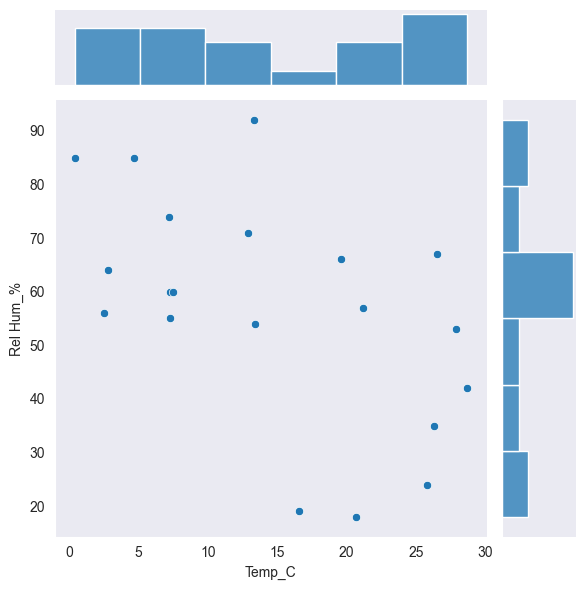

In [31]:
sns.jointplot(x="Temp_C", y="Rel Hum_%", data=Sample)
plt.show()

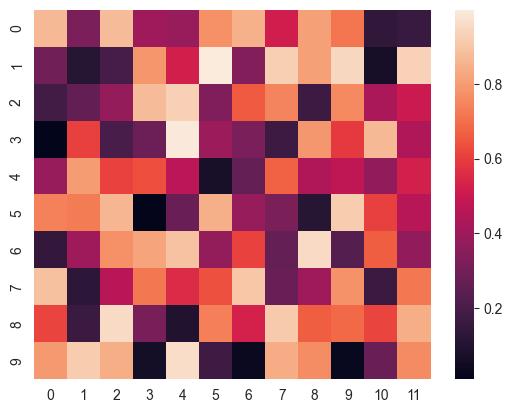

In [32]:
sample_data = np.random.rand(10, 12)
sns.heatmap(sample_data)
plt.show()

In [33]:
data["Rel Hum_%"].skew()

np.float64(-0.32383026939145887)

In [29]:
Sample.groupby('Temp_C')['Rel Hum_%'].mean()*100

Temp_C
-15.0    4700.0
-9.4     6600.0
-5.8     4500.0
-3.1     5500.0
 1.1     5600.0
 4.9     7000.0
 6.2     8200.0
 11.0    8800.0
 12.7    6500.0
 12.9    8600.0
 18.9    7100.0
 19.3    6700.0
 20.2    9400.0
 21.0    4200.0
 21.6    7000.0
 22.1    5900.0
 22.2    7200.0
 23.5    3400.0
 26.5    3800.0
 29.0    5300.0
Name: Rel Hum_%, dtype: float64

<Axes: xlabel='Temp_C'>

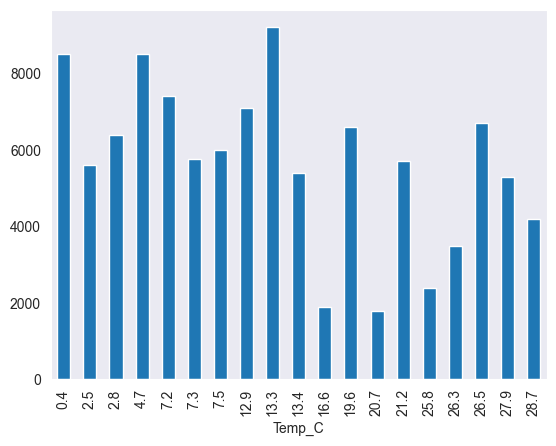

In [36]:
(Sample.groupby('Temp_C')['Rel Hum_%'].mean()*100).plot(kind='bar')


In [33]:
data.columns

Index(['Date', 'Time', 'Weather', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa'],
      dtype='object')

In [34]:
# Dropping columns if they exist, otherwise it will skip without an error
data = data.drop(columns=['Date', 'Time', 'Weather'], errors='ignore')

In [35]:
X = data.drop('Rel Hum_%', axis=1)  # Features (other columns)
y = data['Rel Hum_%']  # Target (humidity)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
print(X_test)

      Temp_C  Dew Point Temp_C  Wind Speed_km/h  Visibility_km  Press_kPa
6385    12.8               9.6               17           25.0     100.46
1488     1.0              -3.2               22           25.0     100.12
6539    12.6               9.8               24           24.1     101.19
3153    11.7               1.6               19           48.3     100.63
496    -11.6             -18.8                7           48.3     102.11
...      ...               ...              ...            ...        ...
4420    14.3              10.5                6           24.1     100.89
746     -6.8              -9.3               19            4.8     100.61
6051    12.6               9.4               17           25.0     100.28
2476     1.2              -4.5                6           25.0     101.56
2024     3.0               1.5                6           24.1     100.74

[2636 rows x 5 columns]


In [38]:
print(X_train)

      Temp_C  Dew Point Temp_C  Wind Speed_km/h  Visibility_km  Press_kPa
7626     2.5              -5.5               11           25.0     102.54
2570    17.4               4.7               30           25.0     100.51
3125    10.9               8.1               17           24.1      99.47
4030    21.5              11.9                9           25.0     101.60
6774     5.4               3.7                7           48.3     102.09
...      ...               ...              ...            ...        ...
5734    23.9              16.9               15           25.0     101.52
5191    21.8              15.3               17           48.3     101.75
5390    26.4              17.0               13           48.3     100.62
860     -2.8              -8.0               24           25.0     101.25
7270    14.2               9.8               50           25.0      99.37

[6148 rows x 5 columns]


In [39]:
print(y_test)

6385    81
1488    73
6539    83
3153    50
496     55
        ..
4420    78
746     82
6051    81
2476    66
2024    90
Name: Rel Hum_%, Length: 2636, dtype: int64


In [40]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [41]:
# Step 8: Print the intercept and coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 132.32233366451624
Coefficients: [-3.77344432  3.98377116 -0.03019613 -0.06395385 -0.39251808]


In [42]:
y_pred=model.predict(X_test)

In [43]:
print(X_test.columns)

Index(['Temp_C', 'Dew Point Temp_C', 'Wind Speed_km/h', 'Visibility_km',
       'Press_kPa'],
      dtype='object')


In [44]:
print(y_pred)

[80.72190325 74.2387508  81.8329937  ... 80.75049114 68.22307149
 85.71292198]


In [45]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2.5180977509362745
Mean Squared Error (MSE): 10.590343821825952
Root Mean Squared Error (RMSE): 3.2542808455672585


In [46]:
# Splitting the data
X = data.drop(['Temp_C'], axis=1)
y = data['Temp_C']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9952534434486026


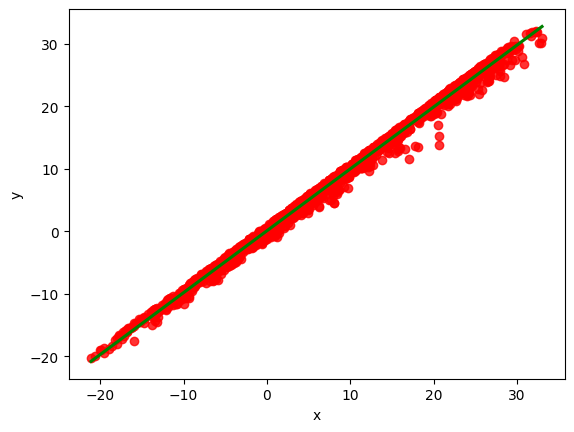

In [47]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color':"red"}, line_kws={"color": "green"})
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [56]:
print(y_test.dtype, y_pred.dtype)


int64 int64


In [49]:
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred]
y_test = [1 if prob > 0.5 else 0 for prob in y_test]

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 481   13]
 [  36 1227]]


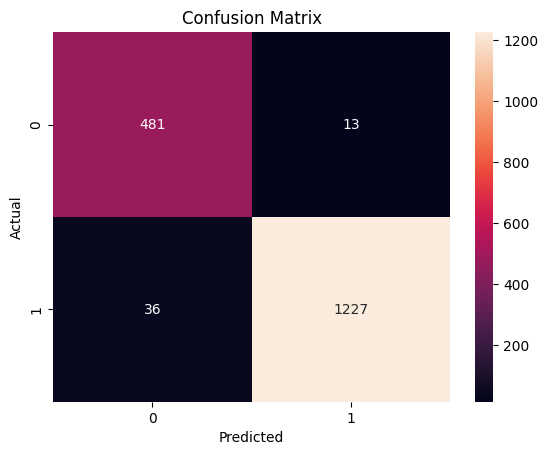

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

C:\Users\Vinod\AppData\Local\Temp\ipykernel_11172\862053234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred), bins=10)


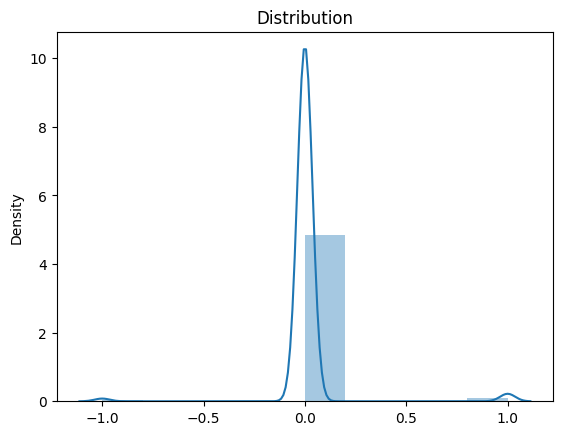

In [58]:

# Plot the residuals
sns.distplot((y_test - y_pred), bins=10)
plt.title('Distribution')
plt.show()

In [57]:
from scipy.stats import ttest_ind

# Hypotheses
H0 = 'There is no significant difference.'
Ha = 'There exists a significant difference.'

def t_test(df, alpha=0.05):
    print('\n' + '*** 2-Sample T-Test Results ***')
    test_result = ttest_ind(df['Temp_C'], df['Rel Hum_%'], equal_var=True)
    p = round(test_result.pvalue, 2)

    if p > alpha:
        print(f"{p} > {alpha}. We fail to reject Null Hypothesis: {H0}")
    else:
        print(f"{p} <= {alpha}. We reject Null Hypothesis: {Ha}")

# Usage with your dataset
t_test(data)



*** 2-Sample T-Test Results ***
0.0 <= 0.05. We reject Null Hypothesis: There exists a significant difference.
